## 作業三 (due 5/2/2023)


## 1. 請計算　台積電、聯發科和聯電　2022年的股價平均值?

## 2. 請分析2022/1/1-2022/12/31期間與台積電絕對值相關度排行第10名的股票是哪一支股票？劃出這兩支股票的股價圖表 (圖表必須包含圖例、座標軸名稱、標題、大小為(7,7))

In [1]:
import pandas as pd
import numpy as np

In [2]:
#第一題
#參考lab5
data = pd.read_csv('./data_science_data.csv',index_col=0)
#提取資料
data = data[['date','證券名稱','收盤價']]
#更改名字
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'收盤價':'closing_price'})
#清理資料
data['closing_price'] = data['closing_price'].replace({'\$':'', ',':'', '--':np.nan}, regex=True)
data = data.dropna()
#更改資料型態
data['closing_price'] = data['closing_price'].astype('float64')
data['date'] = pd.to_datetime(data['date'])

In [3]:
#分組
data_group = data.groupby('name')
data_TSMC = data_group.get_group('台積電')
data_MTK = data_group.get_group('聯發科')
data_UMC = data_group.get_group('聯電')
#第一題印出
print('台積電股價')
display(data_TSMC.mean())
print('聯發科股價')
display(data_MTK.mean())
print('聯電股價')
display(data_UMC.mean())

台積電股價


C:\Users\bob10\AppData\Local\Temp\ipykernel_8748\58771807.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  display(data_TSMC.mean())
C:\Users\bob10\AppData\Local\Temp\ipykernel_8748\58771807.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(data_TSMC.mean())


closing_price    516.206122
dtype: float64

聯發科股價


C:\Users\bob10\AppData\Local\Temp\ipykernel_8748\58771807.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  display(data_MTK.mean())
C:\Users\bob10\AppData\Local\Temp\ipykernel_8748\58771807.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(data_MTK.mean())


closing_price    787.293878
dtype: float64

聯電股價


C:\Users\bob10\AppData\Local\Temp\ipykernel_8748\58771807.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  display(data_UMC.mean())
C:\Users\bob10\AppData\Local\Temp\ipykernel_8748\58771807.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(data_UMC.mean())


closing_price    46.193469
dtype: float64

In [4]:
data_TSMC = data[data['name']=='台積電'].reset_index(drop=True)

In [5]:
display(data_TSMC)

,date,name,closing_price
0,2022-01-03,台積電,631.0
1,2022-01-04,台積電,656.0
2,2022-01-05,台積電,650.0
3,2022-01-06,台積電,644.0
4,2022-01-07,台積電,634.0
...,...,...,...
240,2022-12-26,台積電,456.5
241,2022-12-27,台積電,457.0
242,2022-12-28,台積電,451.0
243,2022-12-29,台積電,446.0


In [6]:
#第二題
#製作一個新的dataframe去接資料
data_TSMC_corr_company = pd.DataFrame()
#製作所有公司的list，方法 : 將data的name這個columns刪除重複項
companies = data['name'].drop_duplicates()
data_TSMC_corr_company['company'] = companies
data_TSMC_corr_company['corr'] = 0

#利用apply遍歷所有公司
def get_corr(x):
    data_company = data[data['name']==x].reset_index(drop=True)
    return abs(data_TSMC['closing_price'].corr(data_company['closing_price']))                                 
data_TSMC_corr_company['corr'] = data_TSMC_corr_company['company'].apply(get_corr)

In [7]:
#排序過後的相關度dataframe
data_TSMC_corr_company = data_TSMC_corr_company.sort_values('corr',ascending = False)
display(data_TSMC_corr_company.iloc[9])

company    國泰臺灣加權正2
corr       0.984278
Name: 47, dtype: object

In [8]:
data_CDT = data[data['name']=='國泰臺灣加權正2'].reset_index(drop=True)
data_TSMC_CDT = pd.merge(data_TSMC[['date','closing_price']],data_CDT[['date','closing_price']],on='date',suffixes=('_TSMC', '_CDT')).set_index('date')

In [9]:
import matplotlib.pyplot as plt

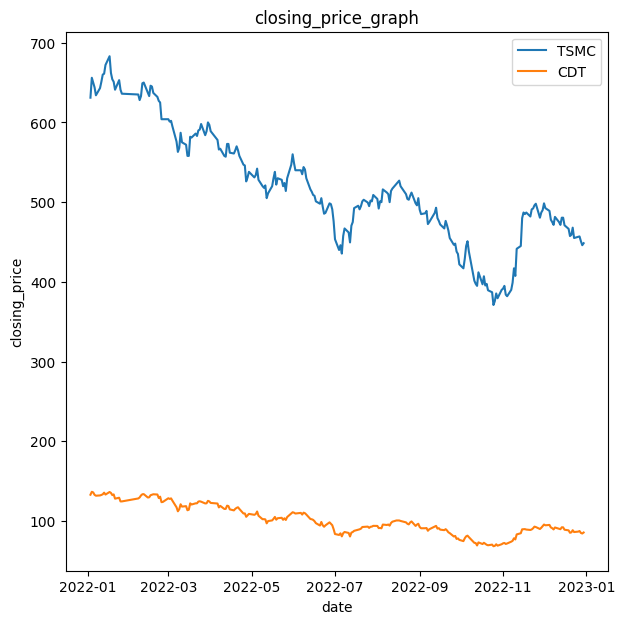

In [10]:
plt.figure(figsize=(7,7))
plt.plot(data_TSMC_CDT['closing_price_TSMC'],label='TSMC')
plt.plot(data_TSMC_CDT['closing_price_CDT'],label='CDT')
plt.legend(loc='best')
#x坐標軸
plt.xlabel("date")
#y坐標軸
plt.ylabel("closing_price")
#標題
plt.title("closing_price_graph")
plt.show()